c:\Users\Sean\anaconda3\envs\pymc3_env\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]


Sampling 4 chains for 1_000 tune and 100_000 draw iterations (4_000 + 400_000 draws total) took 103 seconds.
The number of effective samples is smaller than 25% for some parameters.


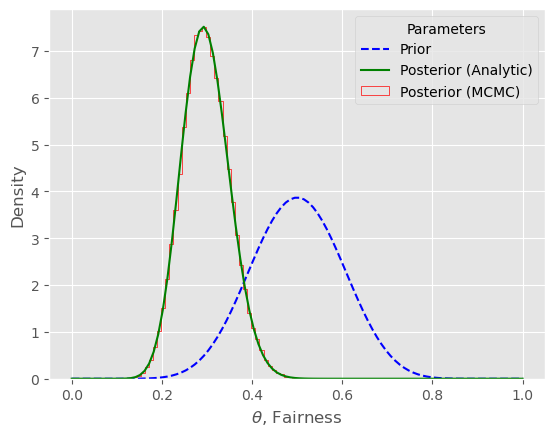

C:\Users\Sean\AppData\Local\Temp\ipykernel_27808\3593510843.py:54: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pymc3.traceplot(trace)
c:\Users\Sean\anaconda3\envs\pymc3_env\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


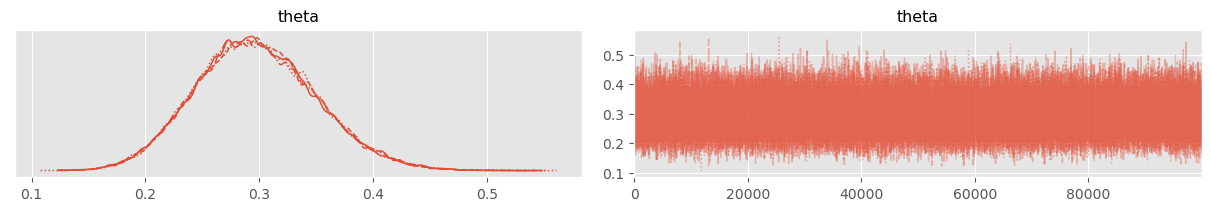

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

plt.style.use("ggplot")
n = 50
z = 10
alpha = 12
beta = 12

alpha_post = 22
beta_post = 52

iterations = 100000
basic_model = pymc3.Model()

with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)
    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP()
    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()
    trace = pymc3.sample(
    iterations, step, start, random_seed=1, progressbar=True
    )
bins=50
plt.hist(
trace["theta"], bins,density=True,
histtype="step",
label="Posterior (MCMC)", color="red"
)

x = np.linspace(0, 1, 100)
plt.plot(
x, stats.beta.pdf(x, alpha, beta),
"--", label="Prior", color="blue"
)

plt.plot(
x, stats.beta.pdf(x, alpha_post, beta_post),
    label='Posterior (Analytic)', color="green"
)

plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

pymc3.traceplot(trace)
plt.show()